# Regression

Two main areas in Machine Learning - classification and regression. Classification answers questions like "is this red or blue?". Regression answers questions around "how much?", such as "how much does this house cost?".

## Absolute Trick

If the point is above the line:

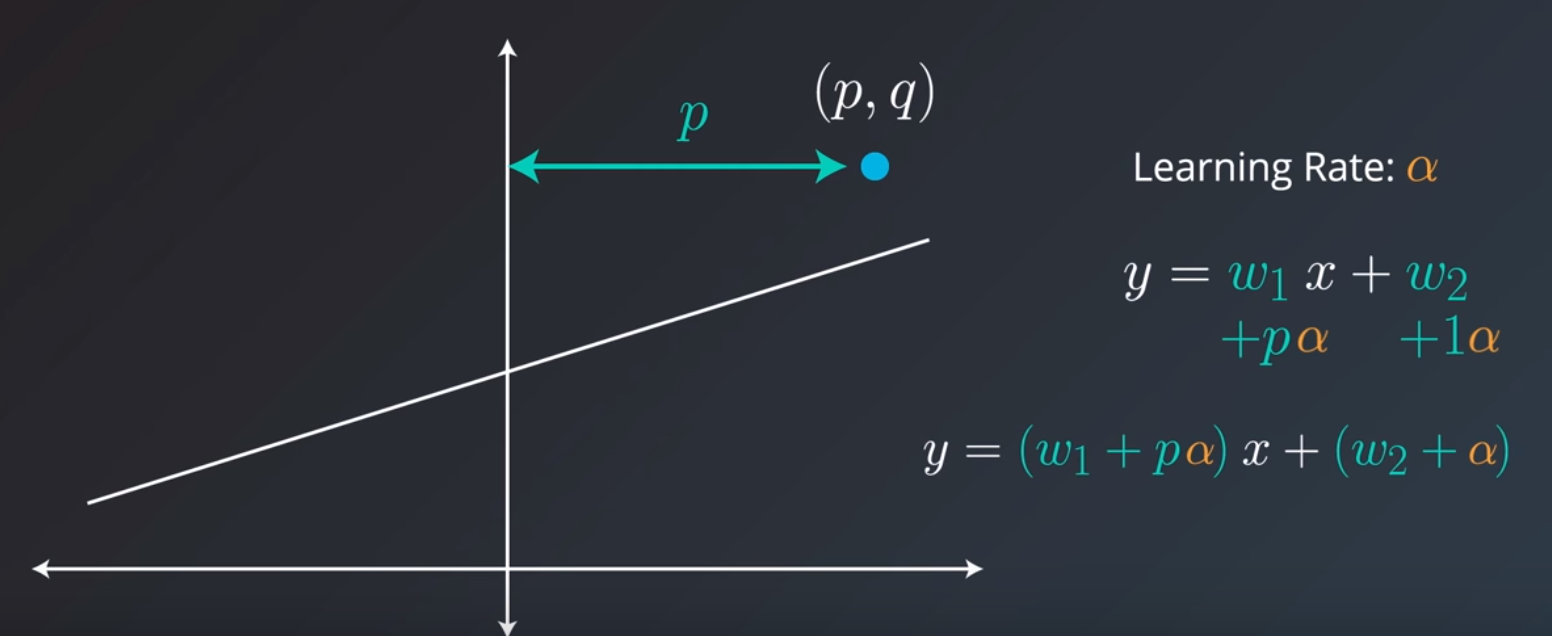

If the point is below the line:

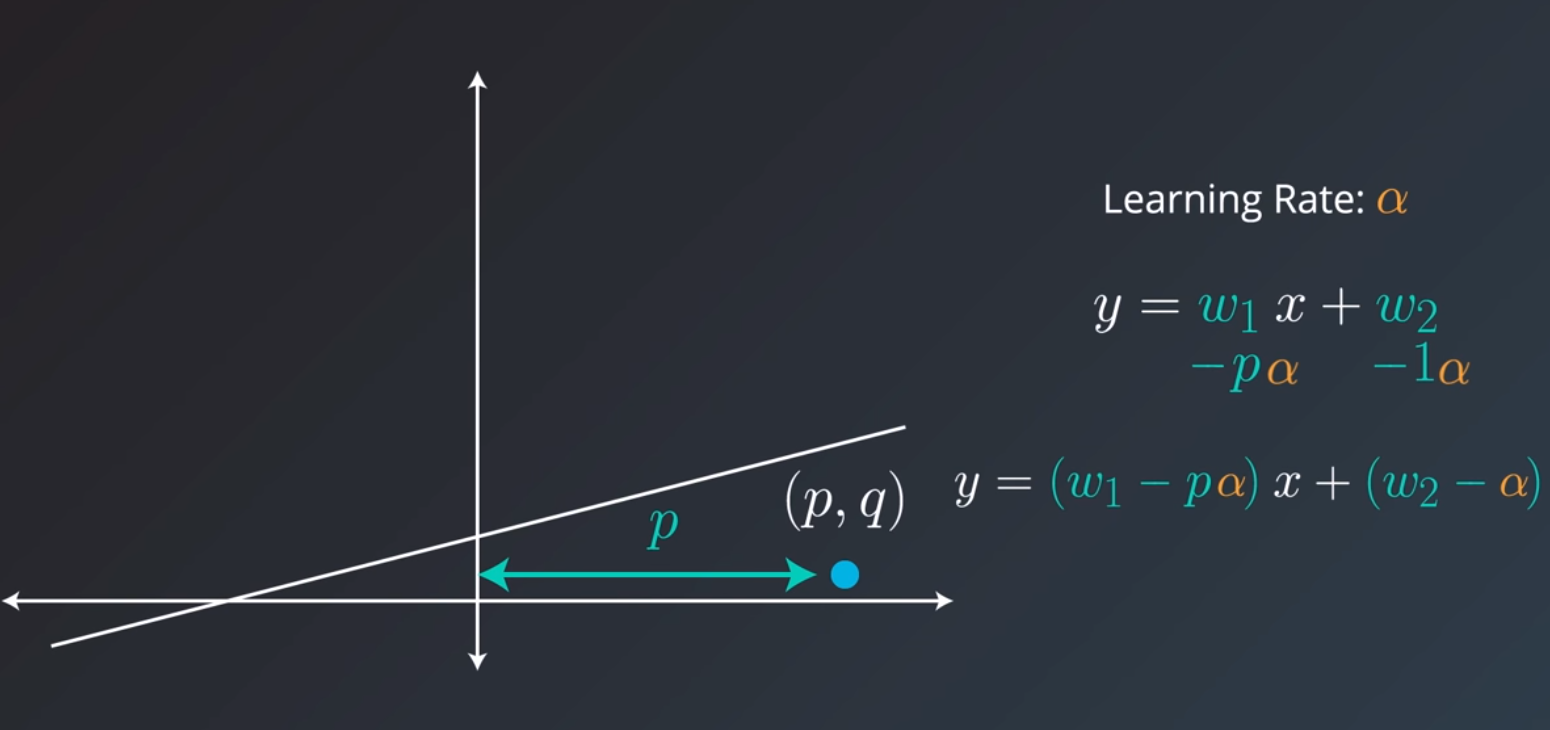

Note that `p` can be a negative value if the value is on the other side of zero (`x` is negative). This is intentional, as it will move the slope of the line accordingly.

Example:

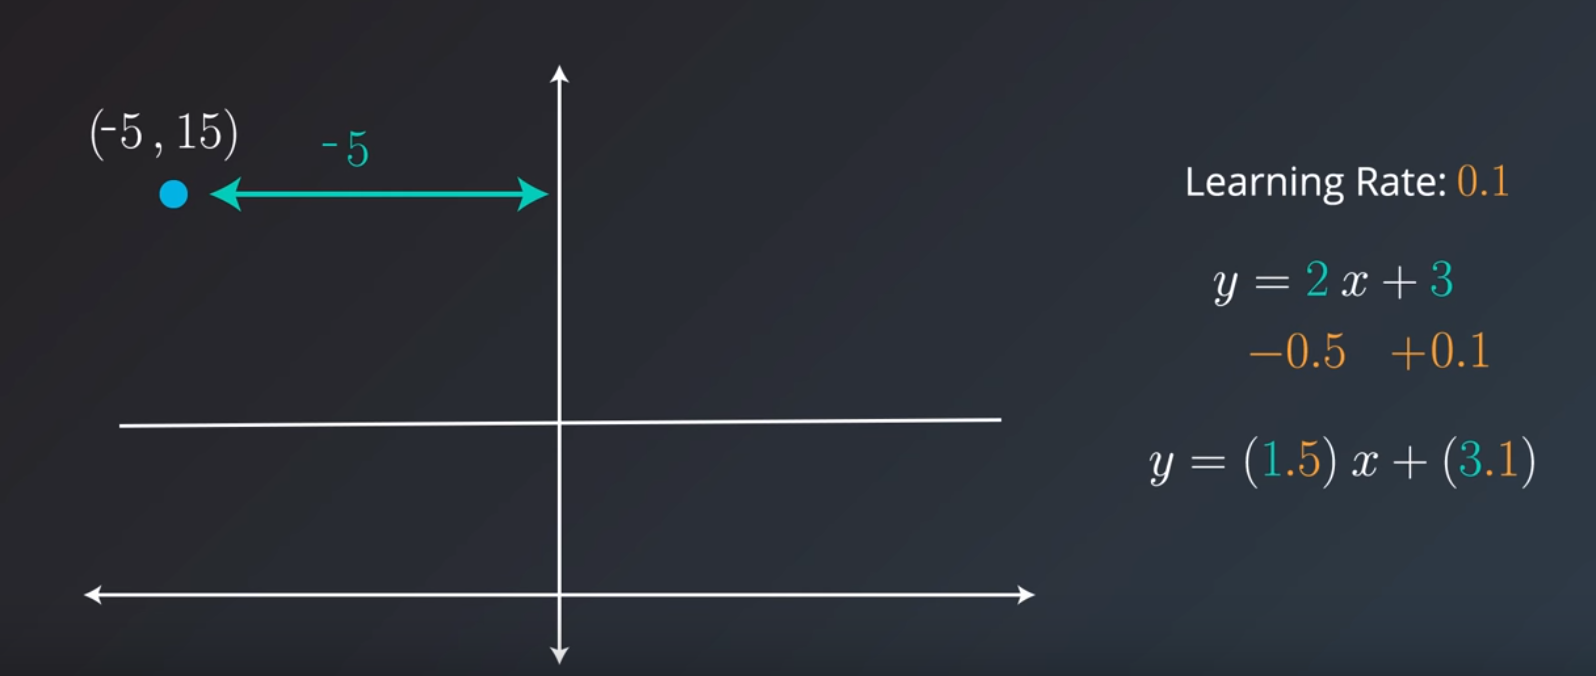

## Square Trick

The square trick just incorporates the vertical `q` distance into the equation (how far the point is from the line).

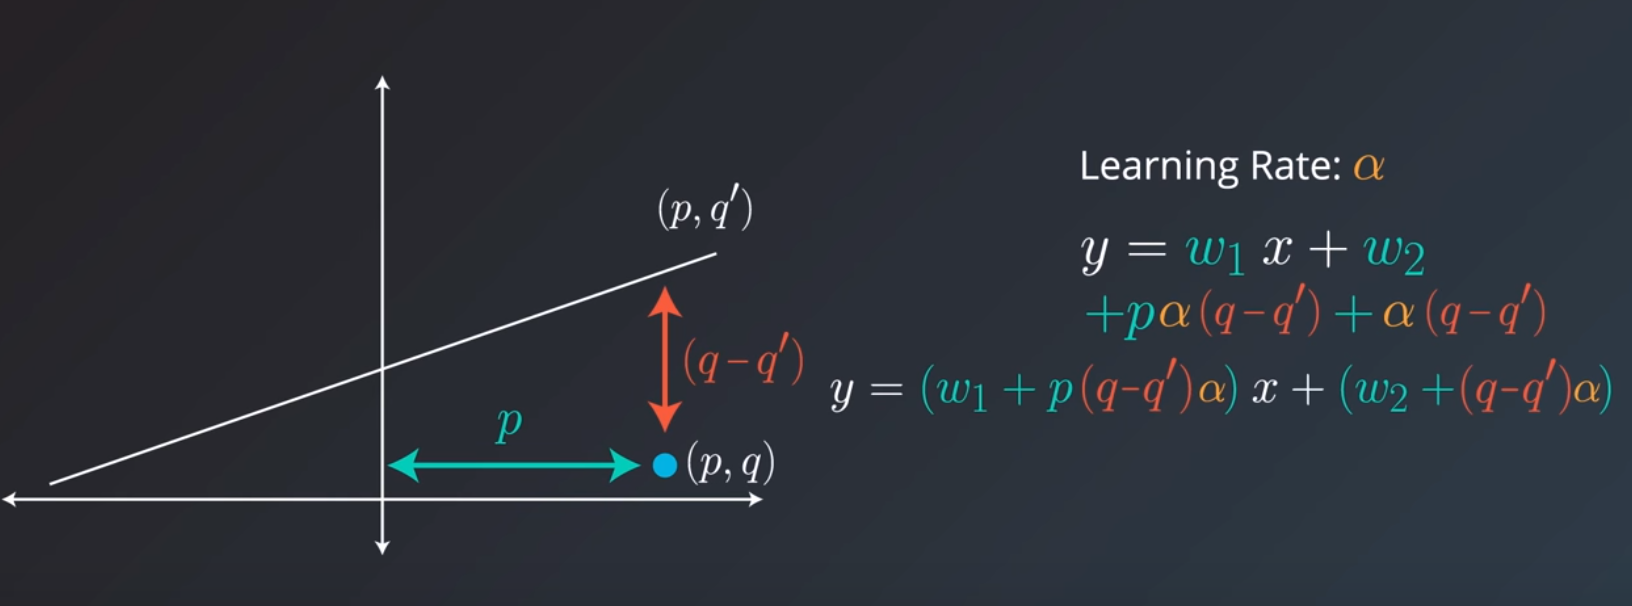

Note that this trick will also take care of negating the slope and y intercept if the point is below the line for us, as `q-q'` will be negative (unlike the absolute trick on its own which required two seperate formulas).

Example:

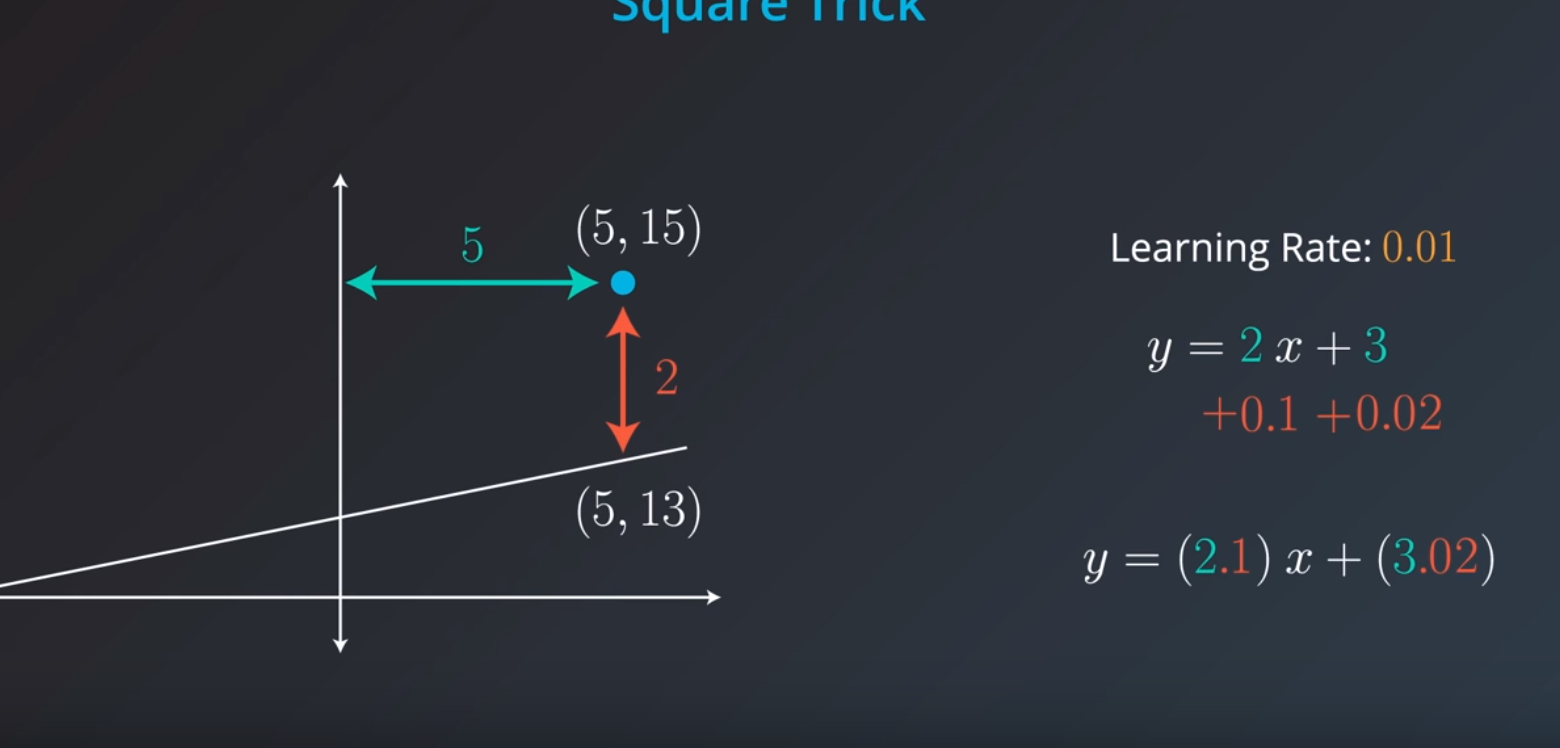

## Error Functions

The two most common functions for calculating error are the **Mean Absolute Error** and the **Mean Square Error**.

### Mean Absolute Error (aka Total Error)

The sum of the vertical (absolute) distances divided by the number of points.

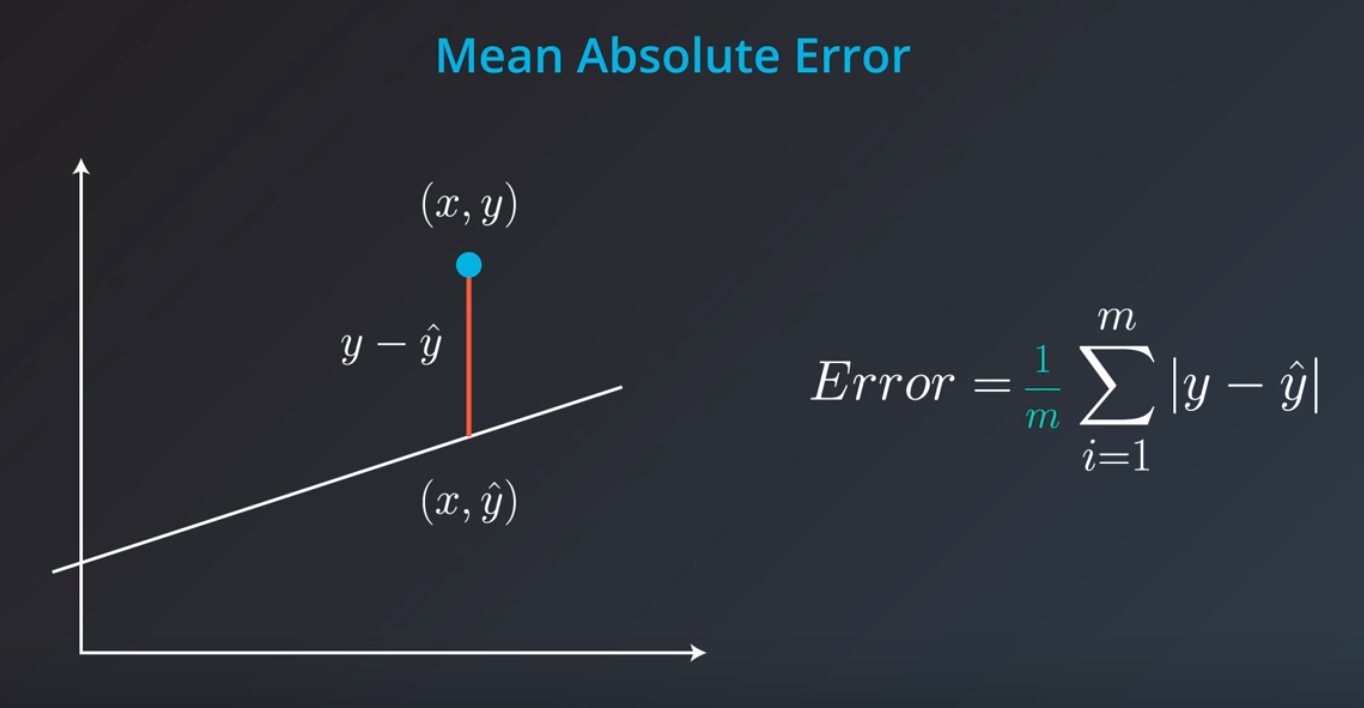

### Mean Square Error

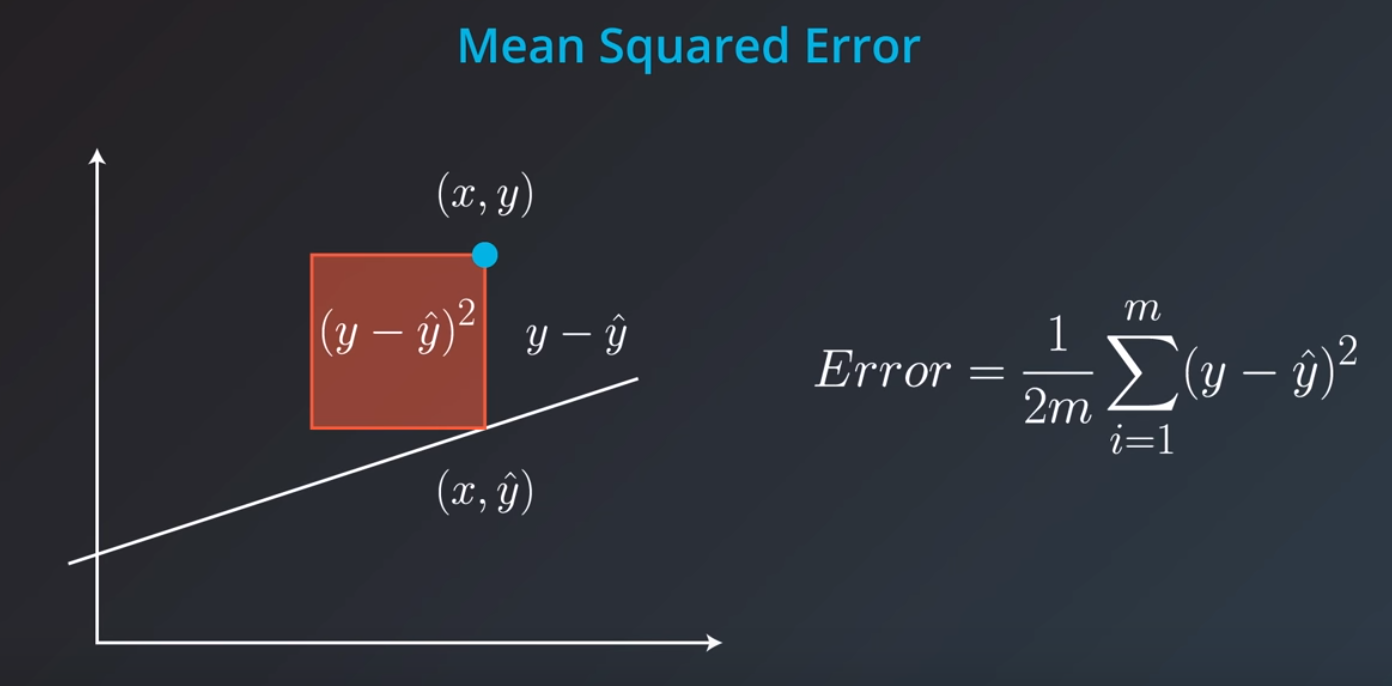

### Mean Square vs Mean Absolute

The good news is, it doesn't really matter. As we can see, the total squared error is just a multiple of the mean squared error, since

T=mM.

Therefore, since derivatives are linear functions, the gradient of T is also m times the gradient of M.

However, the gradient descent step consists of subtracting the gradient of the error times the learning rate α. Therefore, choosing between the mean squared error and the total squared error really just amounts to picking a different learning rate.

## Mini Batch Gradient Descent

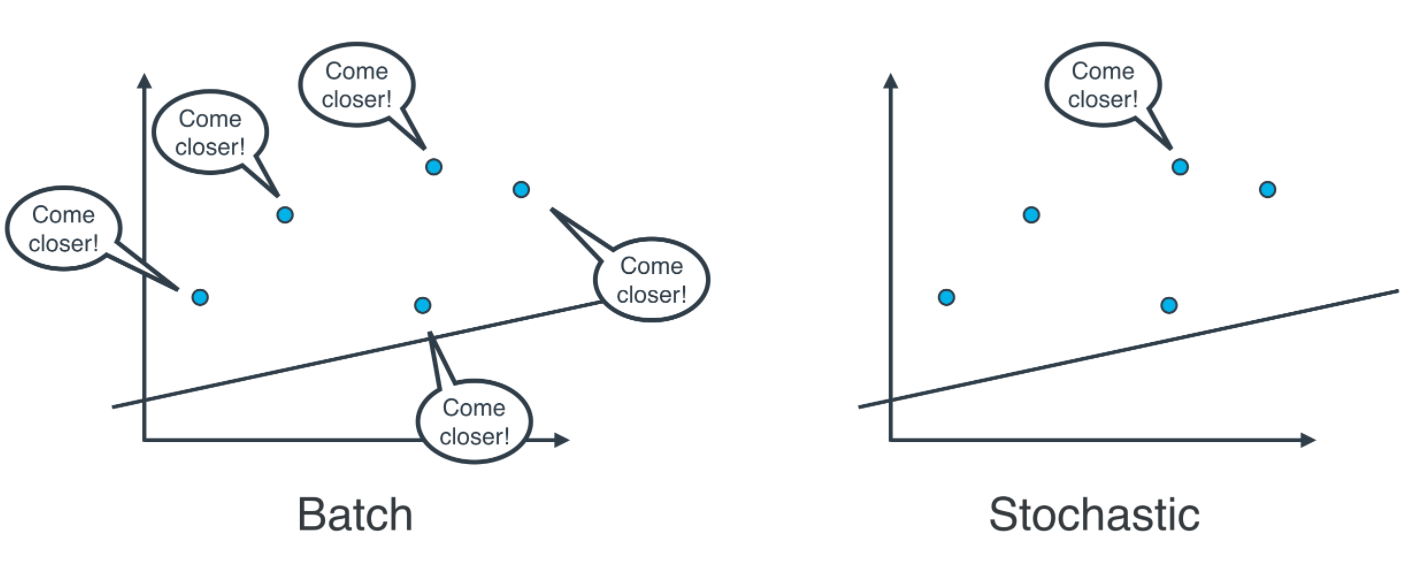

Think about this: If your data is huge, both are a bit slow, computationally. The best way to do linear regression, is to split your data into many small batches. Each batch, with roughly the same number of points. Then, use each batch to update your weights. This is still called mini-batch gradient descent.

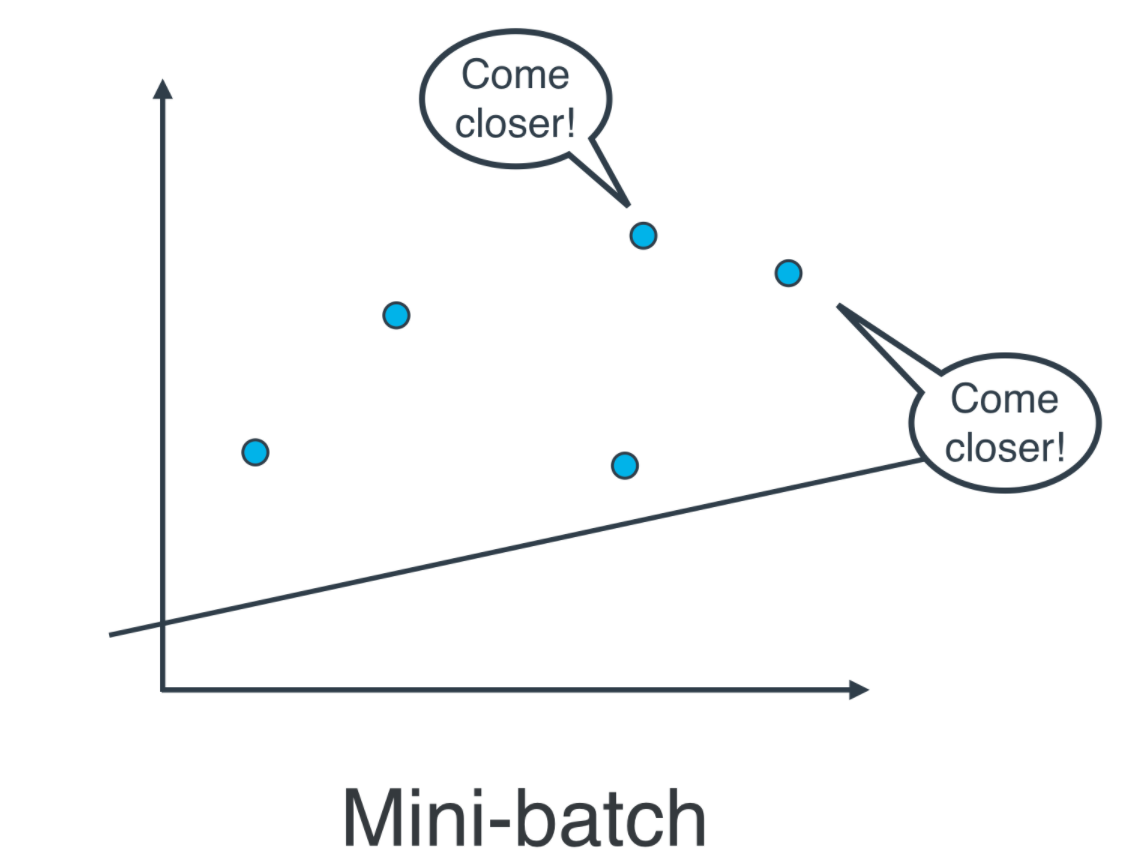

## Linear Regression in SKLearn

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [12]:
# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")
bmi_life_data.head()

Country  Life expectancy       BMI
0  Afghanistan             52.8  20.62058
1      Albania             76.8  26.44657
2      Algeria             75.5  24.59620
3      Andorra             84.6  27.63048
4       Angola             56.7  22.25083

In [64]:
# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_arr = bmi_life_data[['BMI']]
life_expectancy_arr = bmi_life_data[['Life expectancy']]

bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_arr, life_expectancy_arr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict(21.07931)

In [58]:
print(laos_life_exp)

[[ 60.31564716]]


## Multiple Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

In [69]:
# Make and fit the linear regression model
# TODO: Fit the model and Assign it to the model variable
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)

In [70]:
print(prediction)

[ 23.68420569]


## Regularization

If we simply minimize the error, the model on the right of the below diagram will obviously win. However, that being said, the model on the right is much more complicated than the one on the left. The question is: Is there a way the complexity of the model can be added into the error?

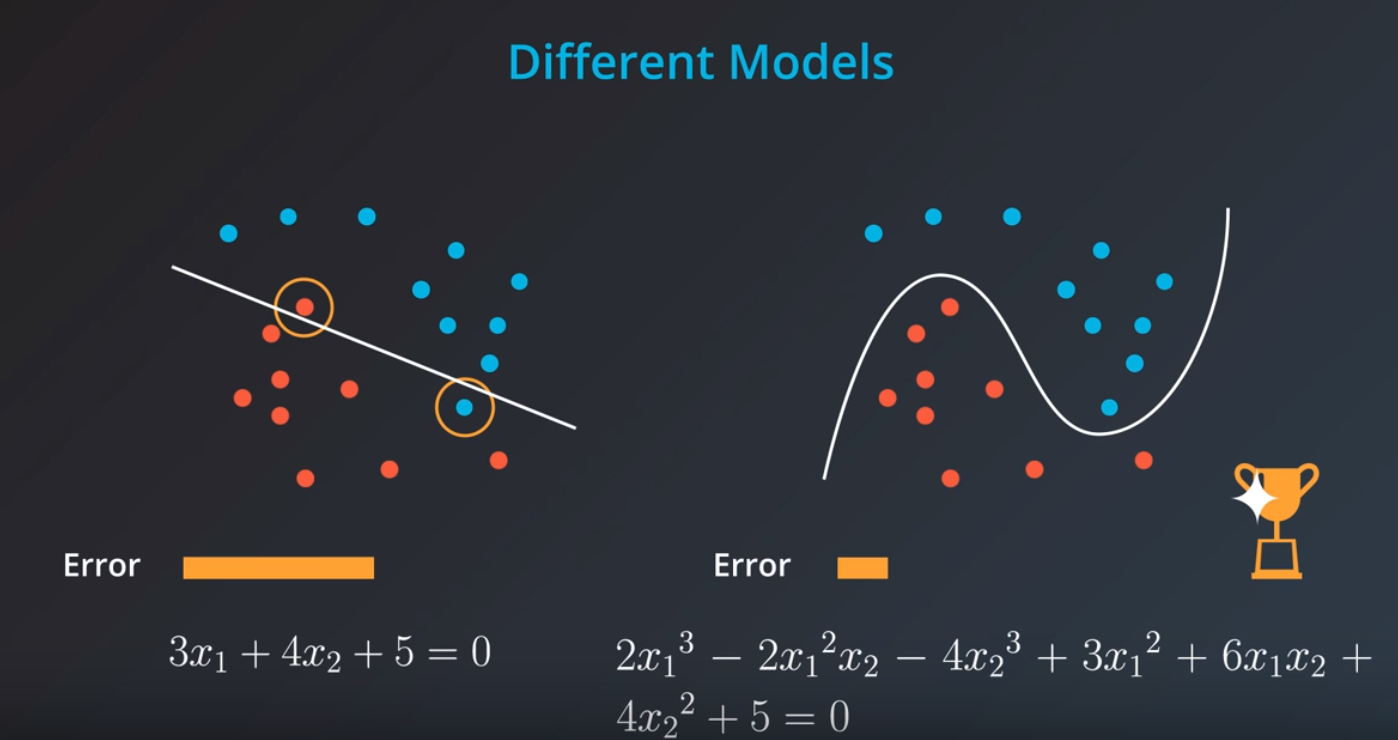

Simpler models usually generalize better.

### L1 Regularization

What we want to do is take the absolutes of coefficients of the equation and add them to the error (e.g. the `3` and `4` in first model).

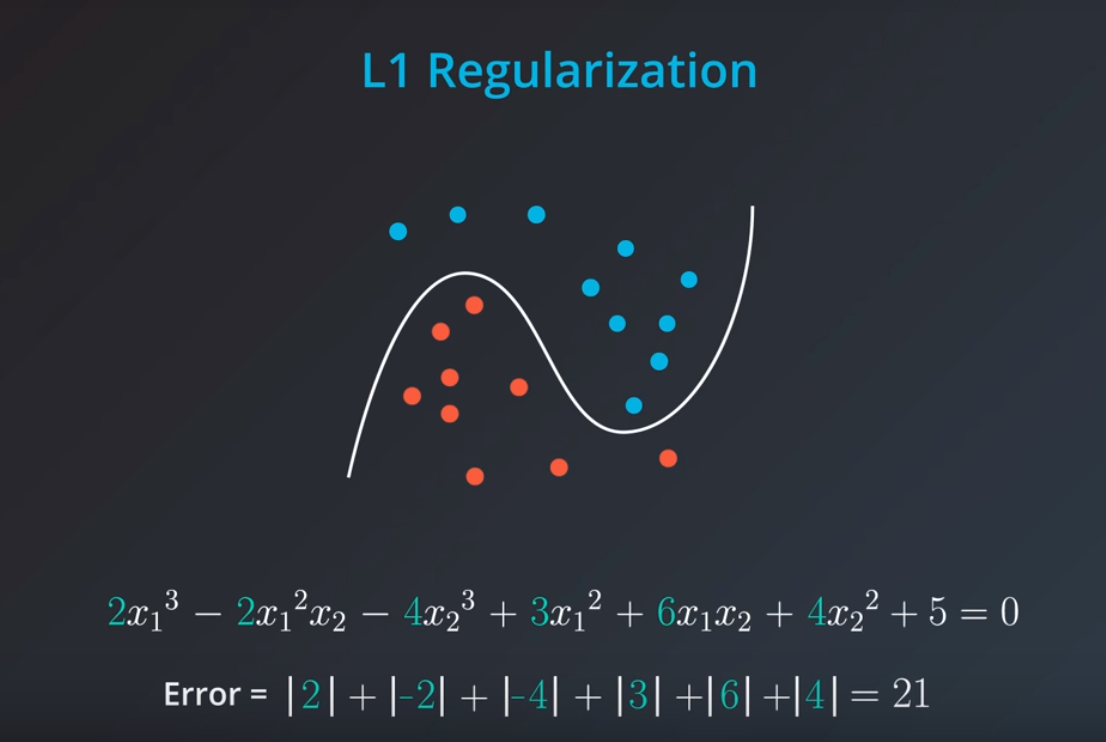

### L2 Regularization

Instead of adding absolute values as in L1, you add the squares of the coefficients.

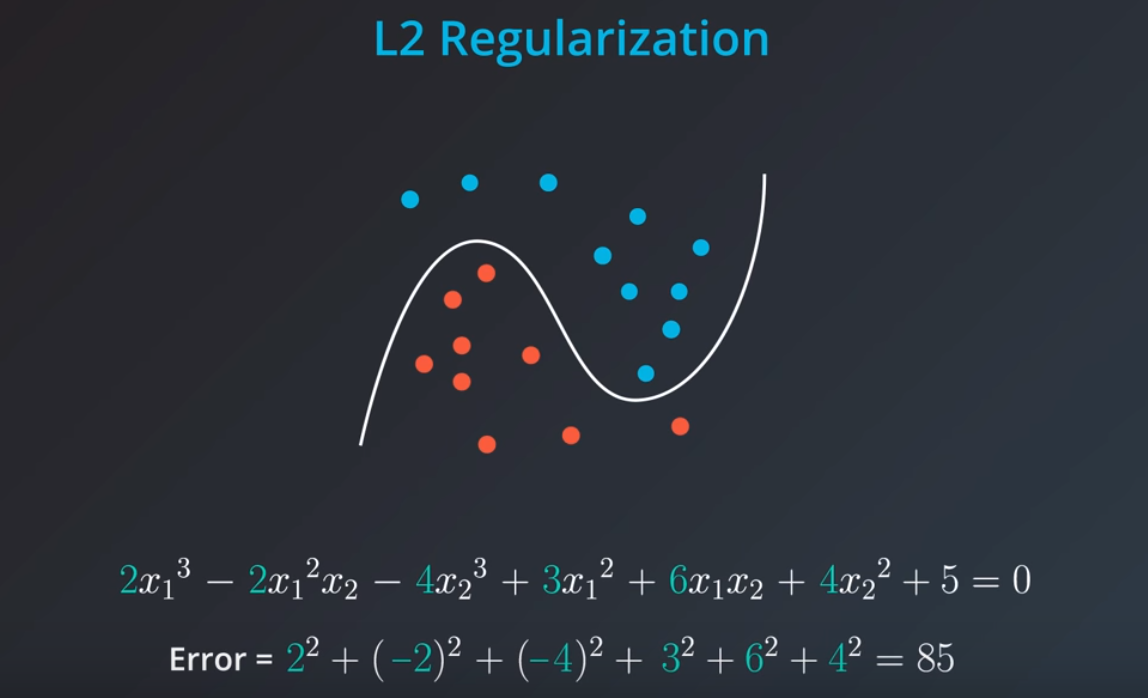

### How to control Regularization

What happens if the penalty for complexity is too large or too small? Some models may need to be very sensitive and low on error, while others may need to run fast and have higher availablity for error.

At this point, we introduct the lambda variable:

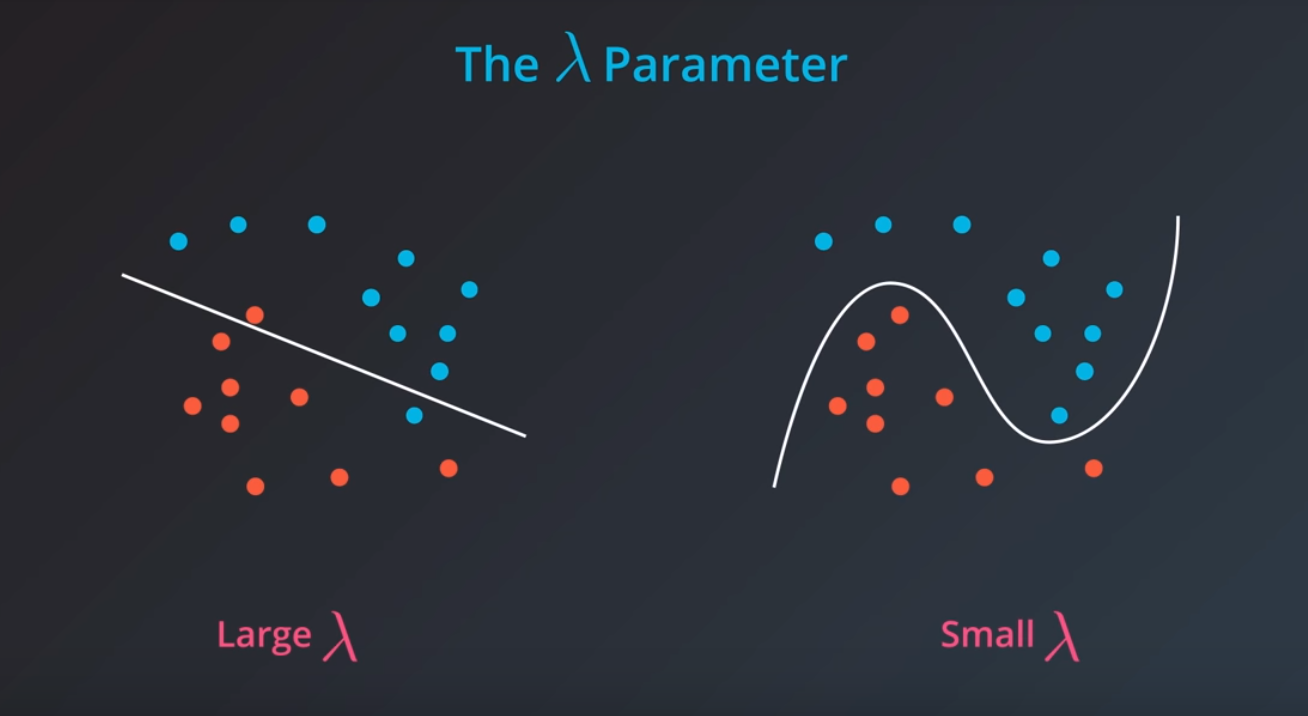

Picking a large lambda punishes complexity alot and will lean towards simpler models. Picking a small lambda will not punish complexity as much, leaning towards more complicated models.

### L1 vs L2

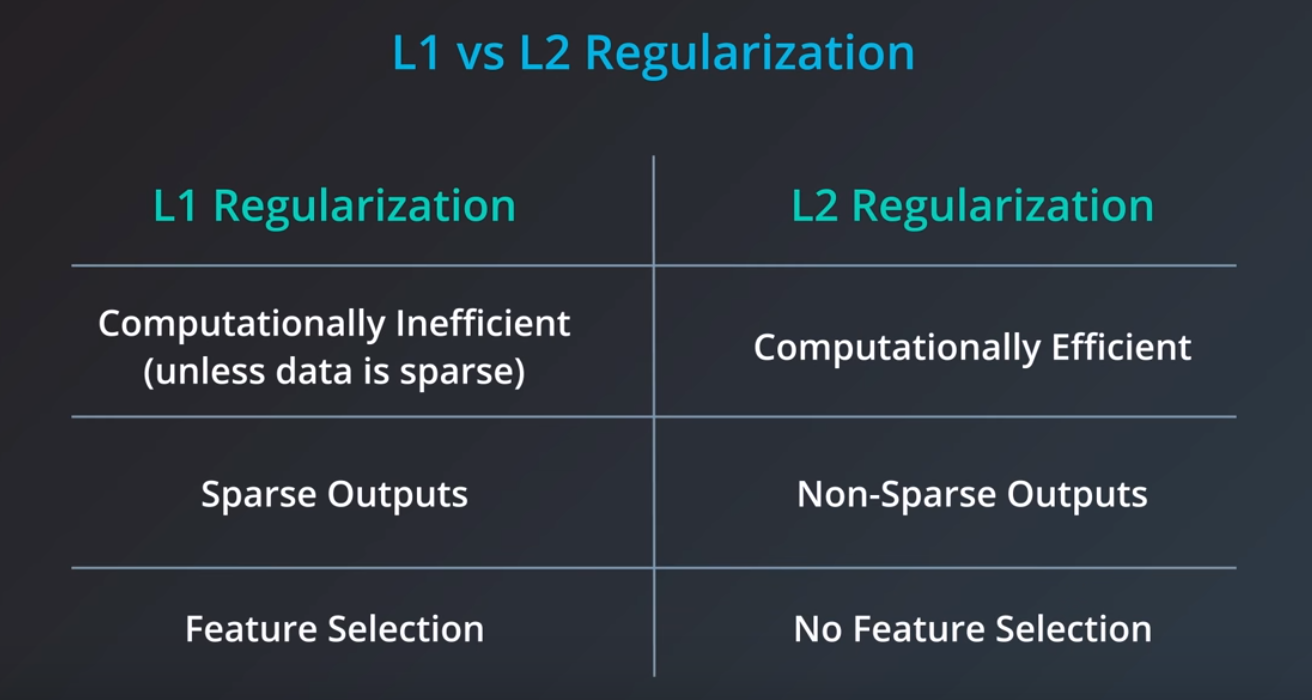

## Neural Networks for Regression

Instead of using a sigmoid or some other activation function to produce a 0 or 1 output at the end, we can just sum the final values to give the prediction and then use an error function against the expected value to calculate the error.

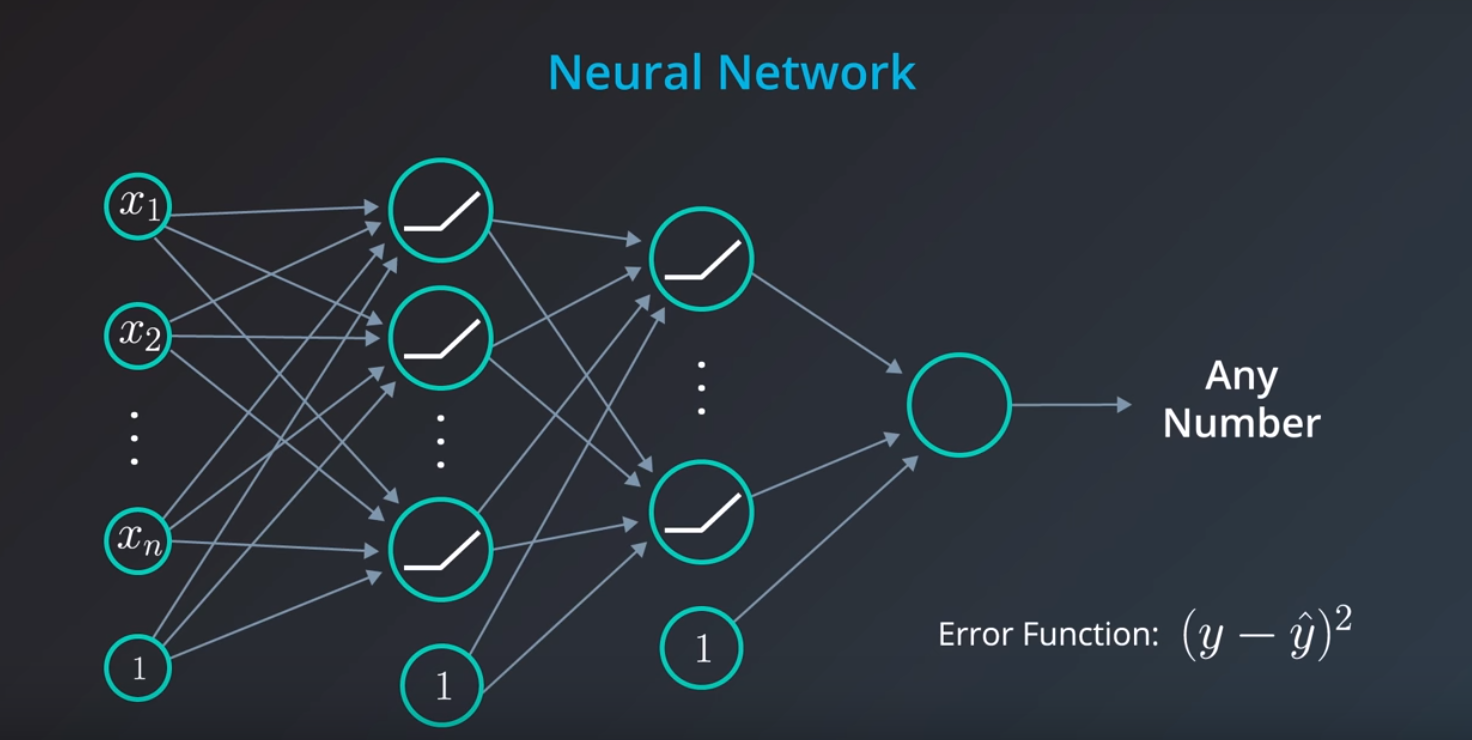